In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

data_dir = "/Users/eduardofierro/Google Drive/TercerSemetre/Optimization/Project/Data/"
graph_dir = "/Users/eduardofierro/Google Drive/TercerSemetre/Optimization/Project/Graphs/"

# Sparse representation denoising

---

- Eduardo Fierro Farah
- Raúl Delgado Sánchez

---

In [3]:
def load_file(datadir, vocab):   
    
    results = pickle.load( open(datadir +  "Results/SVM_HyperParam_ChenEtAl_{}".format(vocab), "rb" ) )
    results = [(vocab,x[0],x[1],x[2]) for x in results]
    
    return results

def load_all(datadir, list_vocab): 
    
    all_results = []
    for size_v in list_vocab: 
        result = load_file(datadir, size_v)
        for touple in result:
            all_results.append(touple)
            
    return all_results

In [4]:
tested_vocab = [50,100,500,1000,5000,10000]
temas = ["Educación", "Campo", "Sistema Financiero", "Electoral", "Derechos Humanos", "Medio Ambiente", "Laboral"]
topics = ["Education", "Farming and Agriculture", "Financial Systems", "Elections", "Human Rights", "Enviroment", "Labor"]
results = load_all(data_dir, tested_vocab)

In [10]:
filter_tema = [x for x in results if x[1] == "Electoral"]
filter_vocab = [x for x in filter_tema if x[0] == 50]

def getBaseline(filter_vocab_): 
    
    baseline = [x[3] for x in filter_vocab_ if x[2] == "Baseline"]
    return baseline[0]

def getUs(filter_vocab_):
    us = [x[2] for x in filter_vocab_ if x[2] != "Baseline"]
    return us

def getAUCs(filter_vocab_):
    aucs = [x[3] for x in filter_vocab_ if x[2] != "Baseline"]
    return aucs

In [5]:
def gen_graph_single(tema_, tema_eng, vocab_size):
    
    filter_tema = [x for x in results if x[1] == tema_]
    filter_vocab = [x for x in filter_tema if x[0] == vocab_size]
    baseline = getBaseline(filter_vocab)
    Us = getUs(filter_vocab)
    AUCs = getAUCs(filter_vocab)
    
    plt.figure(figsize=(8,6))
    plt.plot(Us, AUCs, '-o', label="Values")
    plt.axhline(y=baseline, color='red', linestyle='-', label="Baseline")
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.12), ncol=4)
    plt.xlabel("Initialization of uk from Algorithm 1")
    plt.ylabel("AUC (Log Scale)")
    plt.title("AUC on validation for vocab {} at different initializations of U_k \n Topic: {}".format(vocab_size, tema_eng))
    plt.xscale('log')
    plt.yscale('log')
    plt.savefig("{}/vocab{}_{}.pdf".format(graph_dir, vocab_size, tema_eng), bbox_inches='tight')
    plt.show()

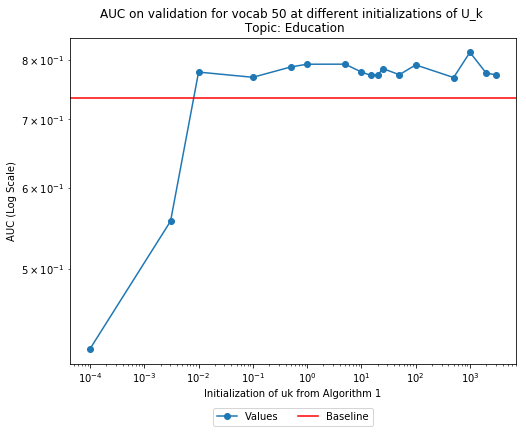

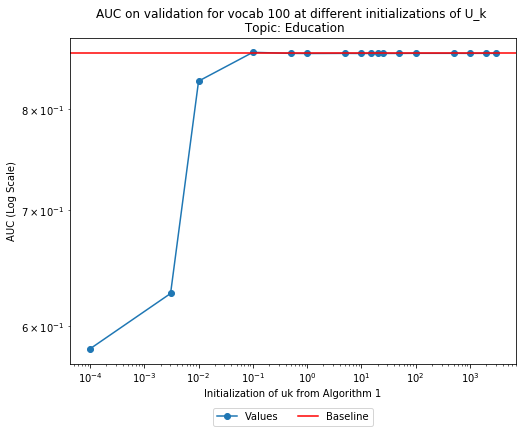

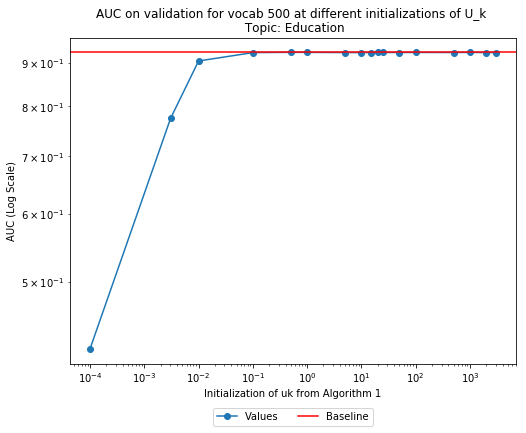

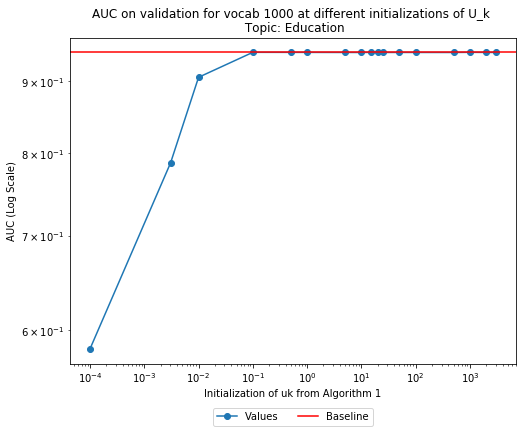

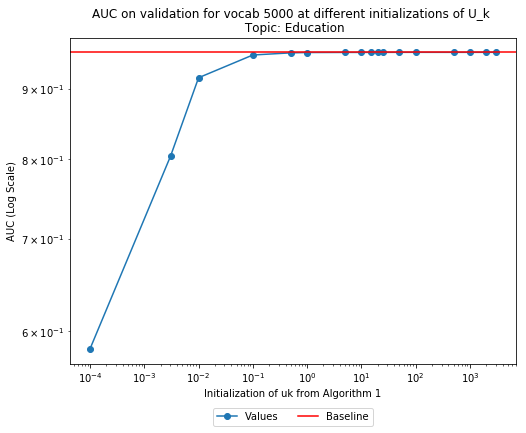

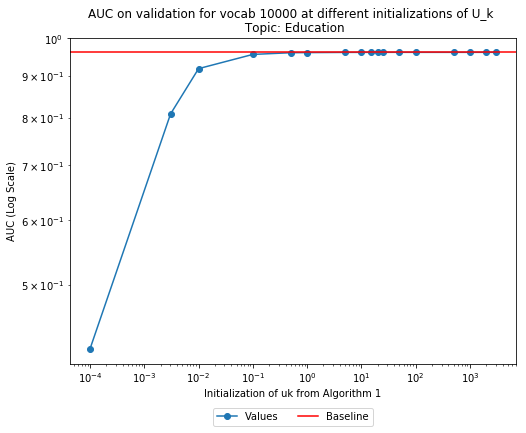

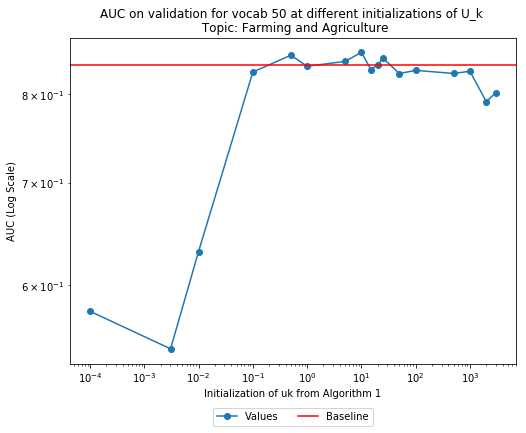

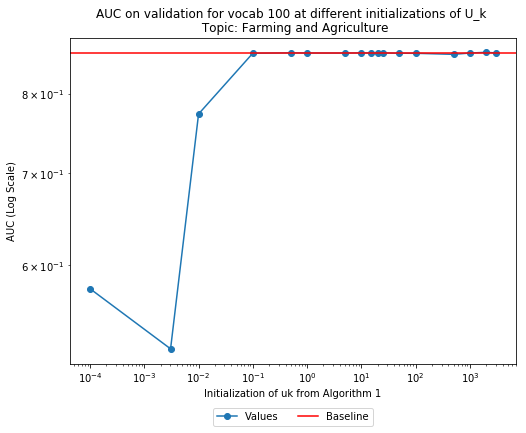

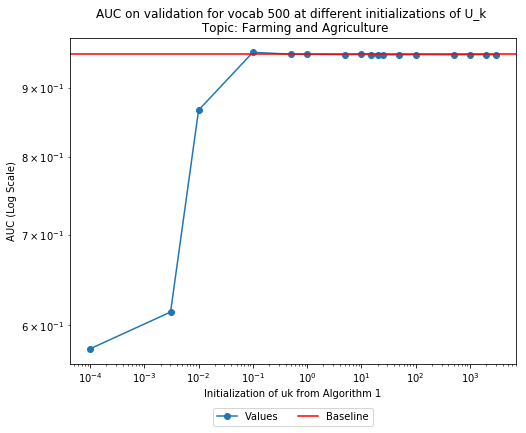

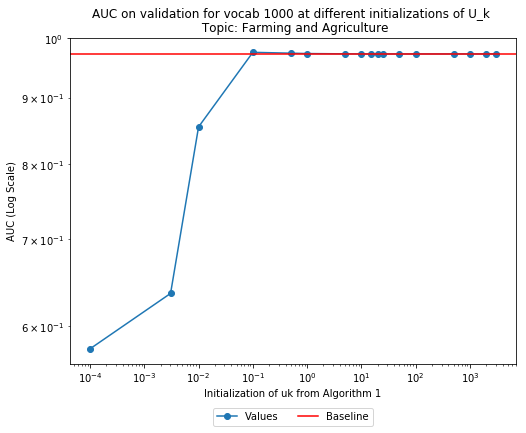

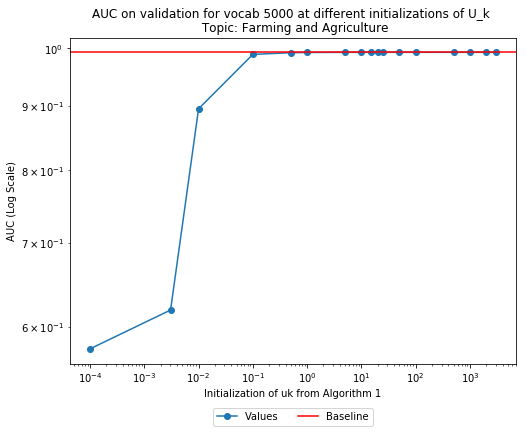

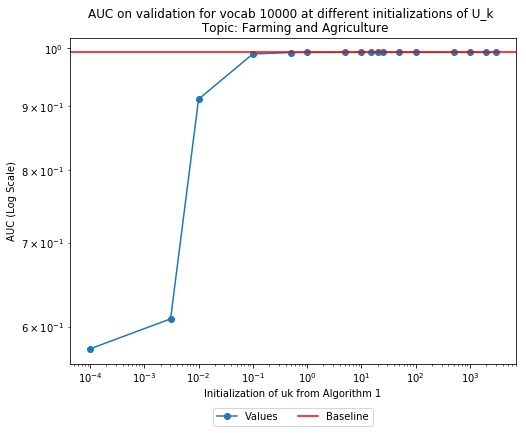

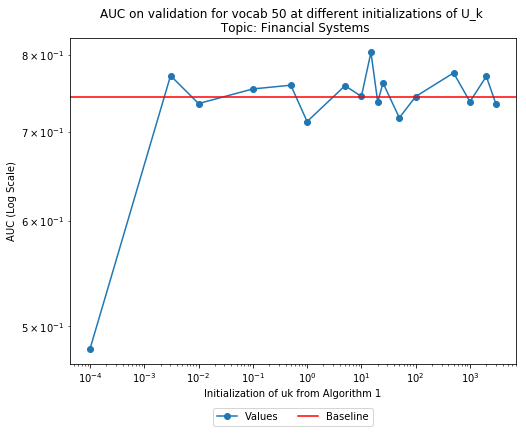

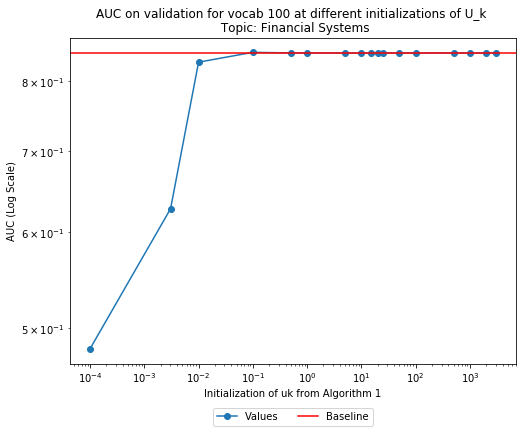

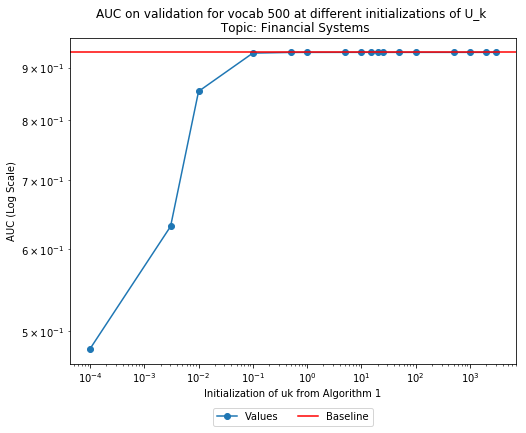

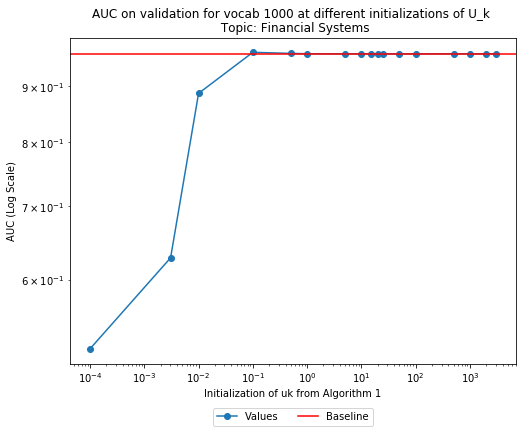

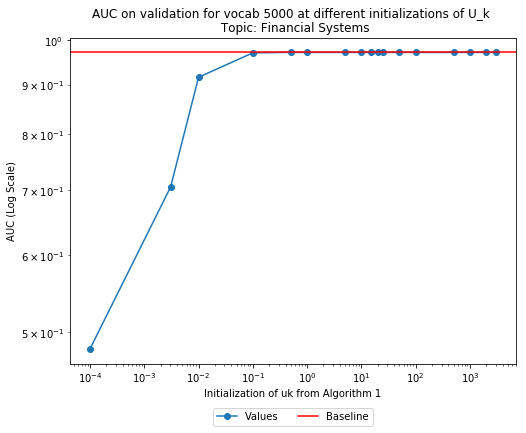

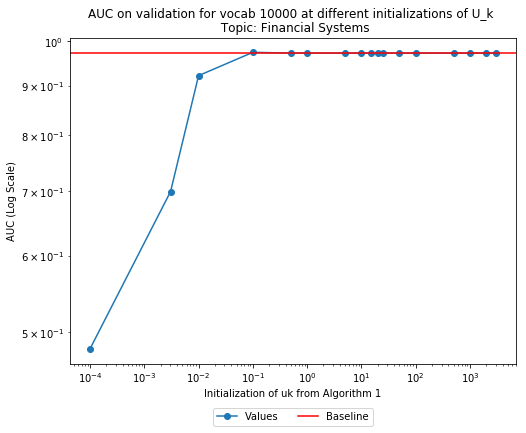

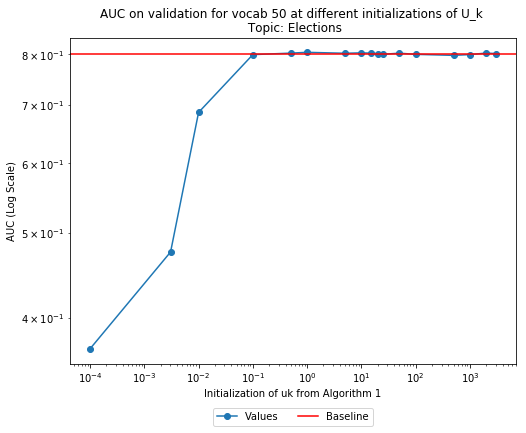

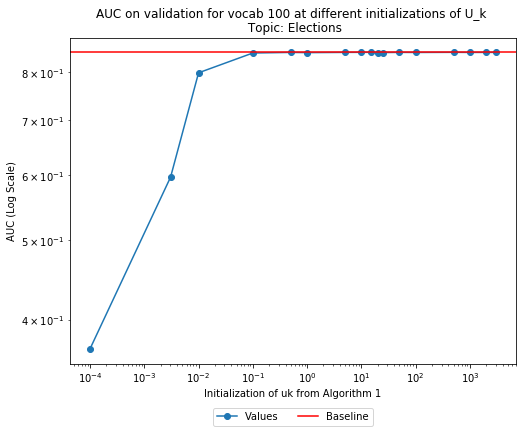

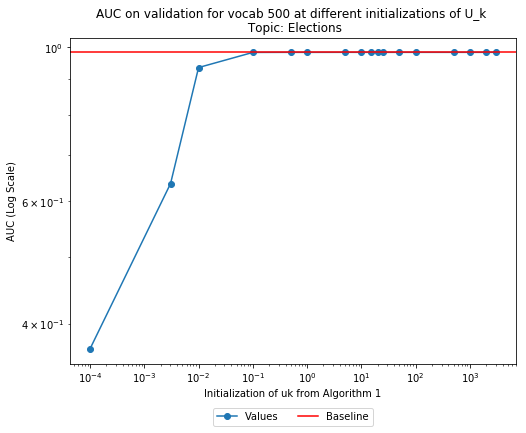

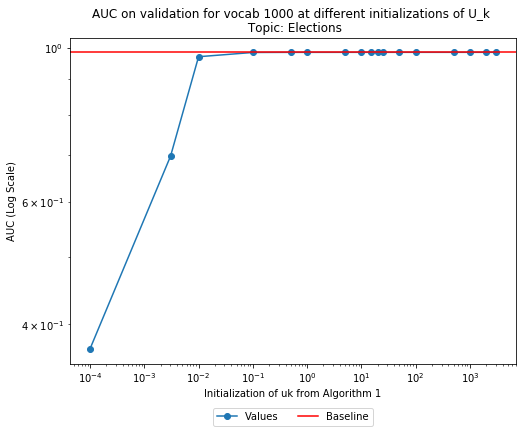

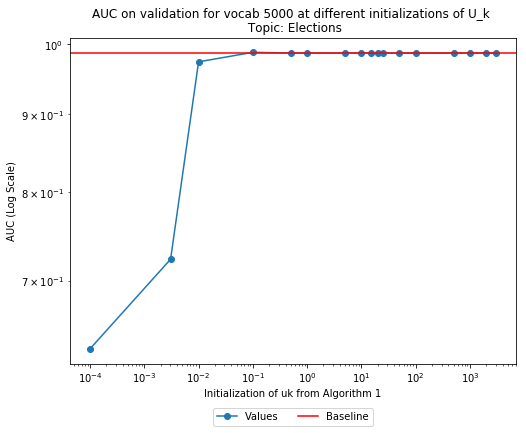

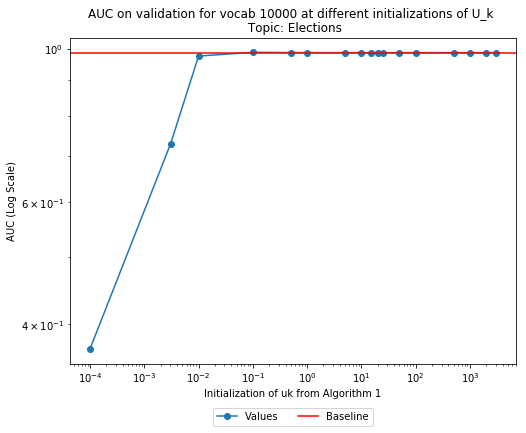

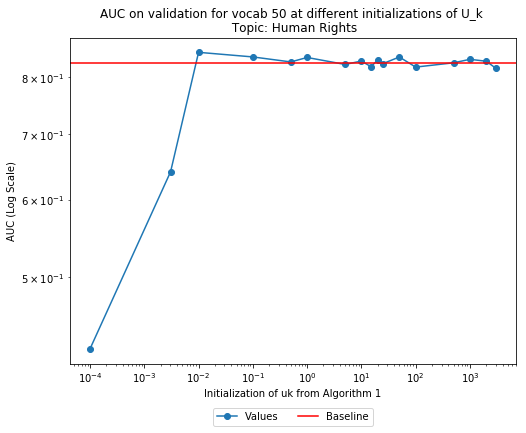

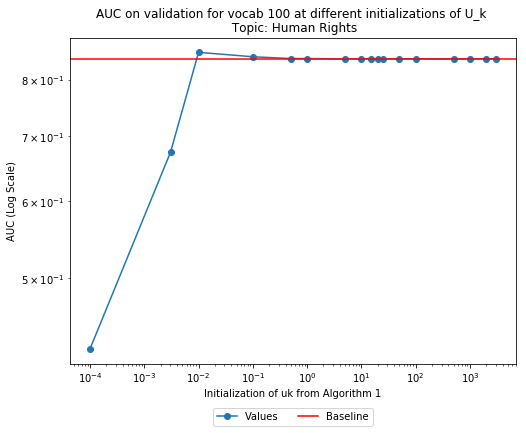

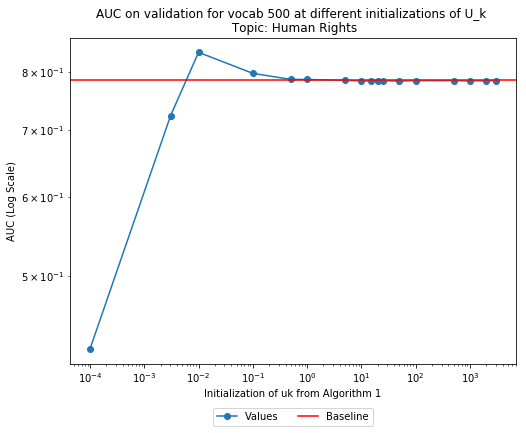

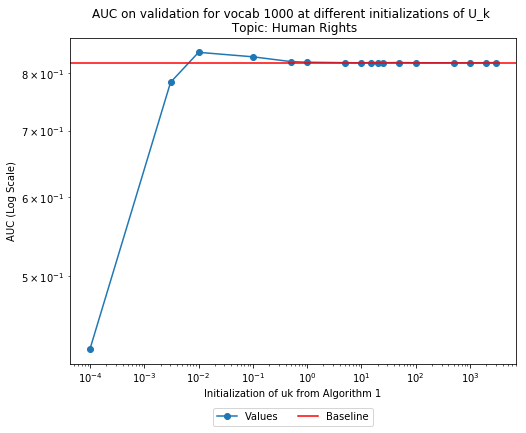

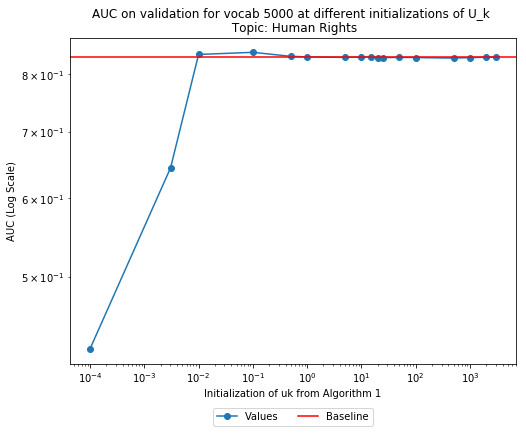

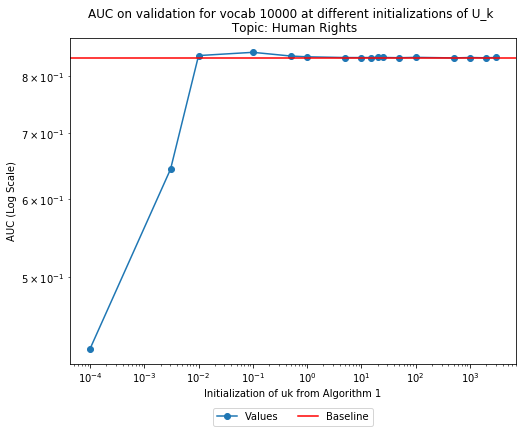

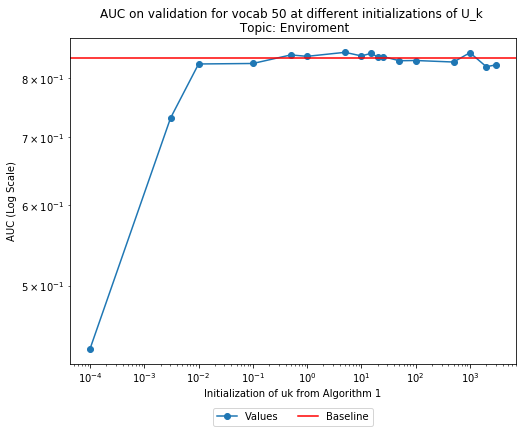

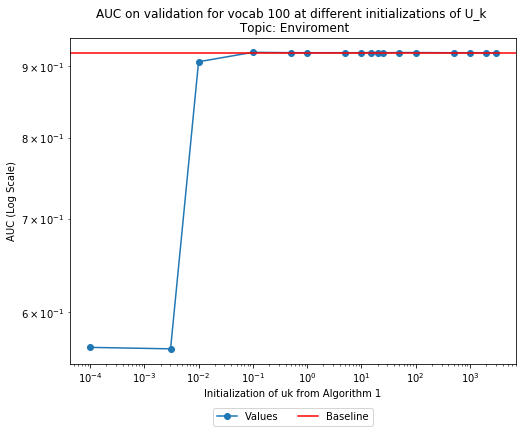

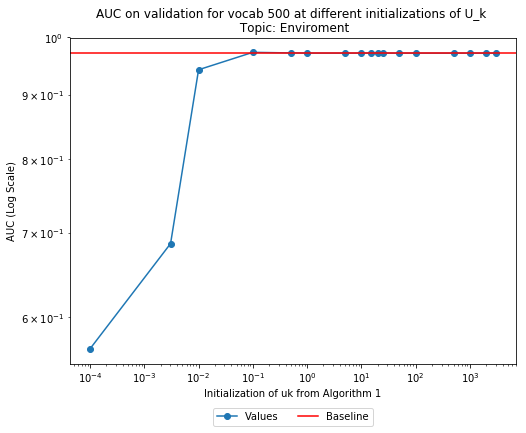

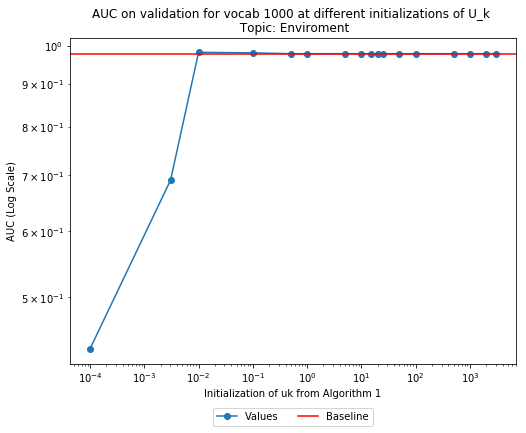

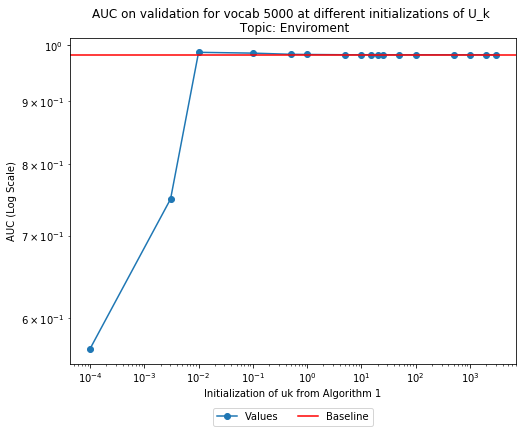

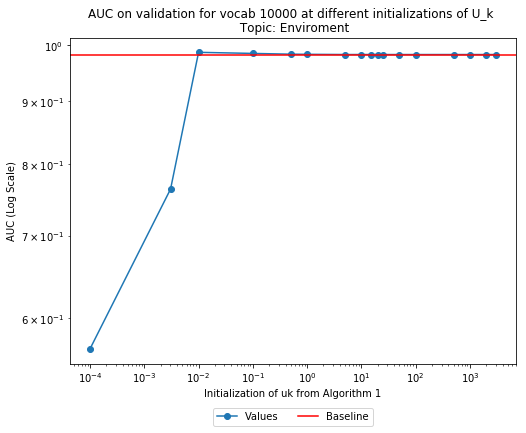

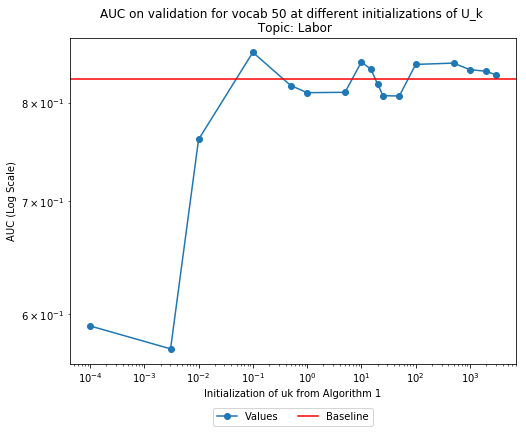

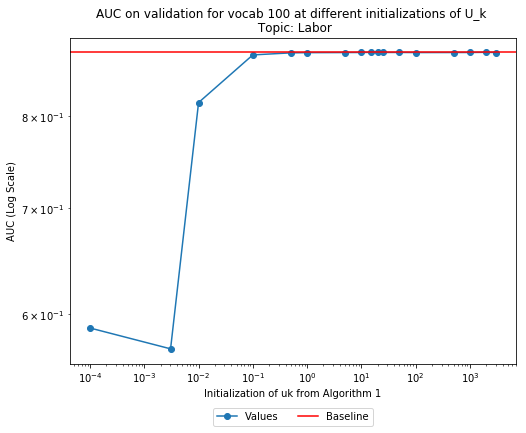

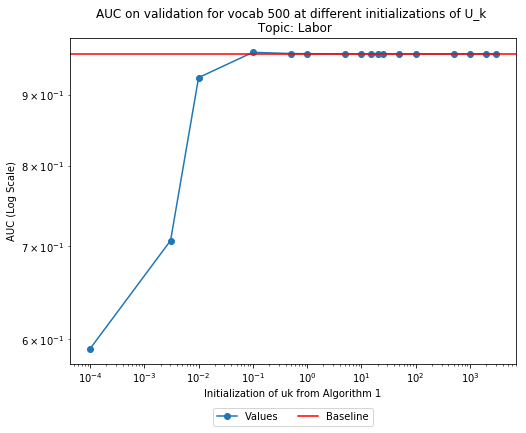

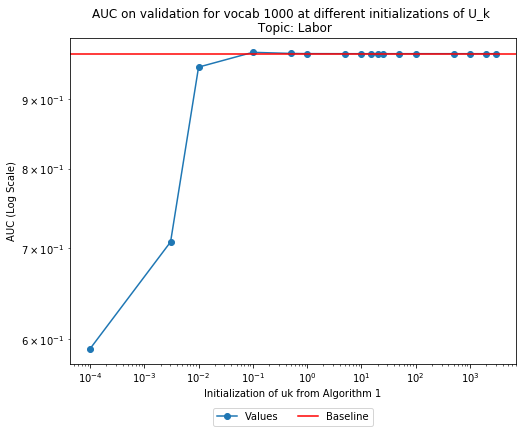

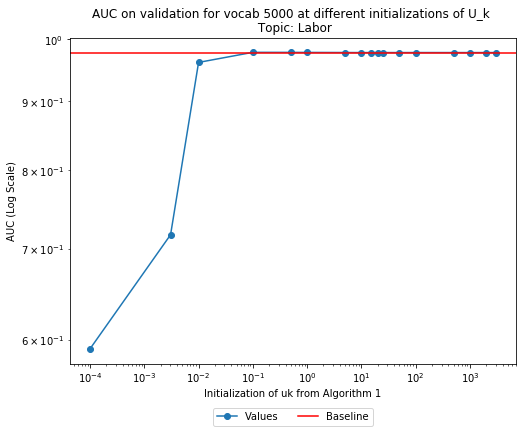

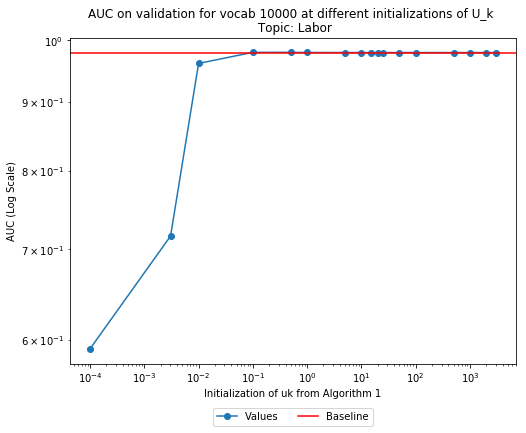

In [6]:
for i, tema in enumerate(temas):
    for v in tested_vocab:
        gen_graph_single(tema, topics[i], v)

### Health graphs (For Latex purposes)

In [25]:
filter_tema = [x for x in results if x[1] == "Derechos Humanos"]

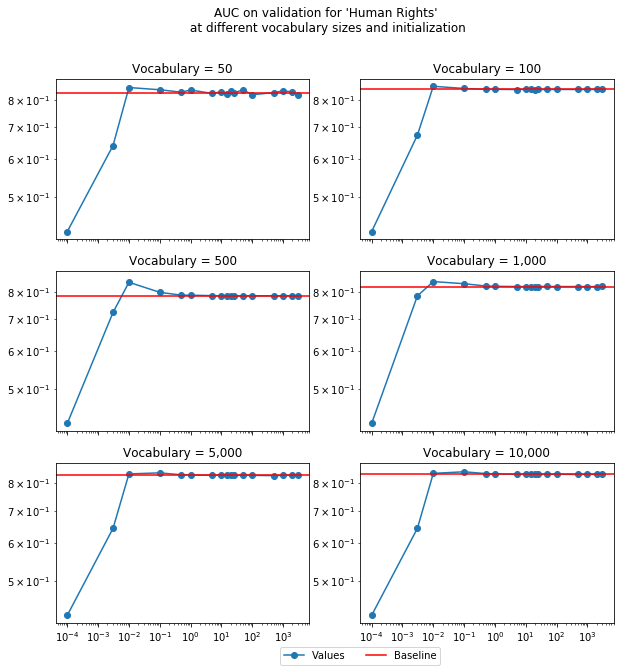

In [60]:
f, axarr = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)
filter_vocab = [x for x in filter_tema if x[0] == 50]
baseline = getBaseline(filter_vocab)
Us = getUs(filter_vocab)
AUCs = getAUCs(filter_vocab)
axarr[0,0].plot(Us, AUCs, '-o', label="Values")
axarr[0,0].axhline(y=baseline, color='red', linestyle='-', label="Baseline")
axarr[0,0].set_title('Vocabulary = 50')

filter_vocab = [x for x in filter_tema if x[0] == 100]
baseline = getBaseline(filter_vocab)
Us = getUs(filter_vocab)
AUCs = getAUCs(filter_vocab)
axarr[0,1].plot(Us, AUCs, '-o', label="Values")
axarr[0,1].axhline(y=baseline, color='red', linestyle='-', label="Baseline")
axarr[0,1].set_title('Vocabulary = 100')

filter_vocab = [x for x in filter_tema if x[0] == 500]
baseline = getBaseline(filter_vocab)
Us = getUs(filter_vocab)
AUCs = getAUCs(filter_vocab)
axarr[1,0].plot(Us, AUCs, '-o', label="Values")
axarr[1,0].axhline(y=baseline, color='red', linestyle='-', label="Baseline")
axarr[1,0].set_title('Vocabulary = 500')

filter_vocab = [x for x in filter_tema if x[0] == 1000]
baseline = getBaseline(filter_vocab)
Us = getUs(filter_vocab)
AUCs = getAUCs(filter_vocab)
axarr[1,1].plot(Us, AUCs, '-o', label="Values")
axarr[1,1].axhline(y=baseline, color='red', linestyle='-', label="Baseline")
axarr[1,1].set_title('Vocabulary = 1,000')

filter_vocab = [x for x in filter_tema if x[0] == 5000]
baseline = getBaseline(filter_vocab)
Us = getUs(filter_vocab)
AUCs = getAUCs(filter_vocab)
axarr[2,0].plot(Us, AUCs, '-o', label="Values")
axarr[2,0].axhline(y=baseline, color='red', linestyle='-', label="Baseline")
axarr[2,0].set_title('Vocabulary = 5,000')

filter_vocab = [x for x in filter_tema if x[0] == 10000]
baseline = getBaseline(filter_vocab)
Us = getUs(filter_vocab)
AUCs = getAUCs(filter_vocab)
axarr[2,1].plot(Us, AUCs, '-o', label="Values")
axarr[2,1].axhline(y=baseline, color='red', linestyle='-', label="Baseline")
axarr[2,1].set_title('Vocabulary = 10,000')

plt.xscale('log')
plt.yscale('log')

plt.legend(loc=9, bbox_to_anchor=(0, -0.12), ncol=4)
plt.suptitle("AUC on validation for 'Human Rights'\n at different vocabulary sizes and initialization")

plt.savefig("{}/vocab_all_HumanRights.pdf".format(graph_dir), bbox_inches='tight')

### Get differences Between Baseline and Denoised

In [32]:
def getMax(filter_vocab_):
    max_val = filter_vocab_[0][3]
    max_u = filter_vocab_[0][2]
    for obs in filter_vocab_:
        if obs[3] > max_val:
            max_val= obs[3]
            max_u = obs[2]
    
    return max_val, max_u

In [40]:
filter_tema = [x for x in results if x[1] == "Derechos Humanos"]
for z in tested_vocab:
    filter_vocab = [x for x in filter_tema if x[0] == z]
    max_val_, max_u_ = getMax(filter_vocab)
    baseline = getBaseline(filter_vocab)
    change_baseline = ((max_val_ - baseline)/baseline)*100
    print("Vocab size = {}; U init Max = {}; Baseline {}; Algorithm = {}; Change w.r.t baseline = {}%".format(z, max_u_, round(baseline,3), round(max_val_,3), round(change_baseline, 3)))

Vocab size = 50; U init Max = 0.01; Baseline 0.827; Algorithm = 0.848; Change w.r.t baseline = 2.55%
Vocab size = 100; U init Max = 0.01; Baseline 0.841; Algorithm = 0.853; Change w.r.t baseline = 1.53%
Vocab size = 500; U init Max = 0.01; Baseline 0.784; Algorithm = 0.837; Change w.r.t baseline = 6.644%
Vocab size = 1000; U init Max = 0.01; Baseline 0.82; Algorithm = 0.839; Change w.r.t baseline = 2.429%
Vocab size = 5000; U init Max = 0.1; Baseline 0.832; Algorithm = 0.842; Change w.r.t baseline = 1.123%
Vocab size = 10000; U init Max = 0.1; Baseline 0.836; Algorithm = 0.846; Change w.r.t baseline = 1.245%
